# Customer Churn Project

For service providers such as Telecoms/Broadband, they are constantly looking to provide the best offers to customers in order to gain their business. Part of this strategy also focuses on retaining customers and ensuring they don't leave for rival businesses. Understanding which groups of people might be looking to leave can help businesses to plan their marketing and special offer strategies.

In this project I will be exploring the effect of Customer Churn on a Telcoms company and using Machine Learning to predict the probability that a customer will leave on the near future. This information could then be used to curate offers to incentivise existing customers for continuing their business.

The dataset used can be found on [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

I begin by importing some libraries that will be useful for the project and also reading in the data as a DataFrame.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

I can see that there are `7043` customer entries and `21` columns to the data - each could be a potential feature.

In [ ]:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

By focusing on the `Churn` column, I can view the proportion of those listed as `Yes` (27%) and those listed as `No` (73%).
The dataset is quite heavily imbalanced, with far more entries listed as `No`. This is something I will look to address later in the project.

## Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Looking at the different columns, I can see that there are several which are currently the wrong type.

Notably the `TotalCharges` column is a string so I will convert that to numeric.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


After converting to numeric, the `TotalCharges` column is showing 11 null values. I will explore these examples to see how best to deal with them.

In [ ]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


So for each of these 11 entries, the `tenure` column is showing zeroes. This could indicate that each are new customers and yet to complete one month as a customer, hence their first bill has not come through.

For these I will fill the null entries with zeroes rather than remove them completely.

In [ ]:
df['TotalCharges'].fillna(0, inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are several categorical columns such as `Partner`, `Dependents` and `PhoneService` which indicate in string format whether they apply to that particular customer. The columns include binary answers such as `Yes` and `No`.

To prepare for the Machine Learning model phase, I will change these categories to ones and zeroes - something the models will understand.

In [ ]:
for col in ['Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']:
  df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


Some of the categories include more options than a simple binary `Yes` or `No`. For these columns I will use `pd.get_dummies` to create additional columns and capture the binary choices.

In [ ]:
categorical_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,29.85,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,1889.50,0,1,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,108.15,1,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,1840.75,0,1,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,151.65,1,0,1,0,0,0,0,1,0


After creating the additional columns, there are now `25` in total.

In [ ]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,...,2279.734304,0.265370,0.504756,0.439585,0.216669,0.209144,0.240664,0.216101,0.335794,0.228880
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,...,2266.794470,0.441561,0.500013,0.496372,0.412004,0.406726,0.427517,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1394.550000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3786.600000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation

I will plot a simple correlation map for all the numerical features to see if there are any clear correlations between the features and the `Churn`.

<ipython-input-12-963a7d4e13b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, cbar=True)


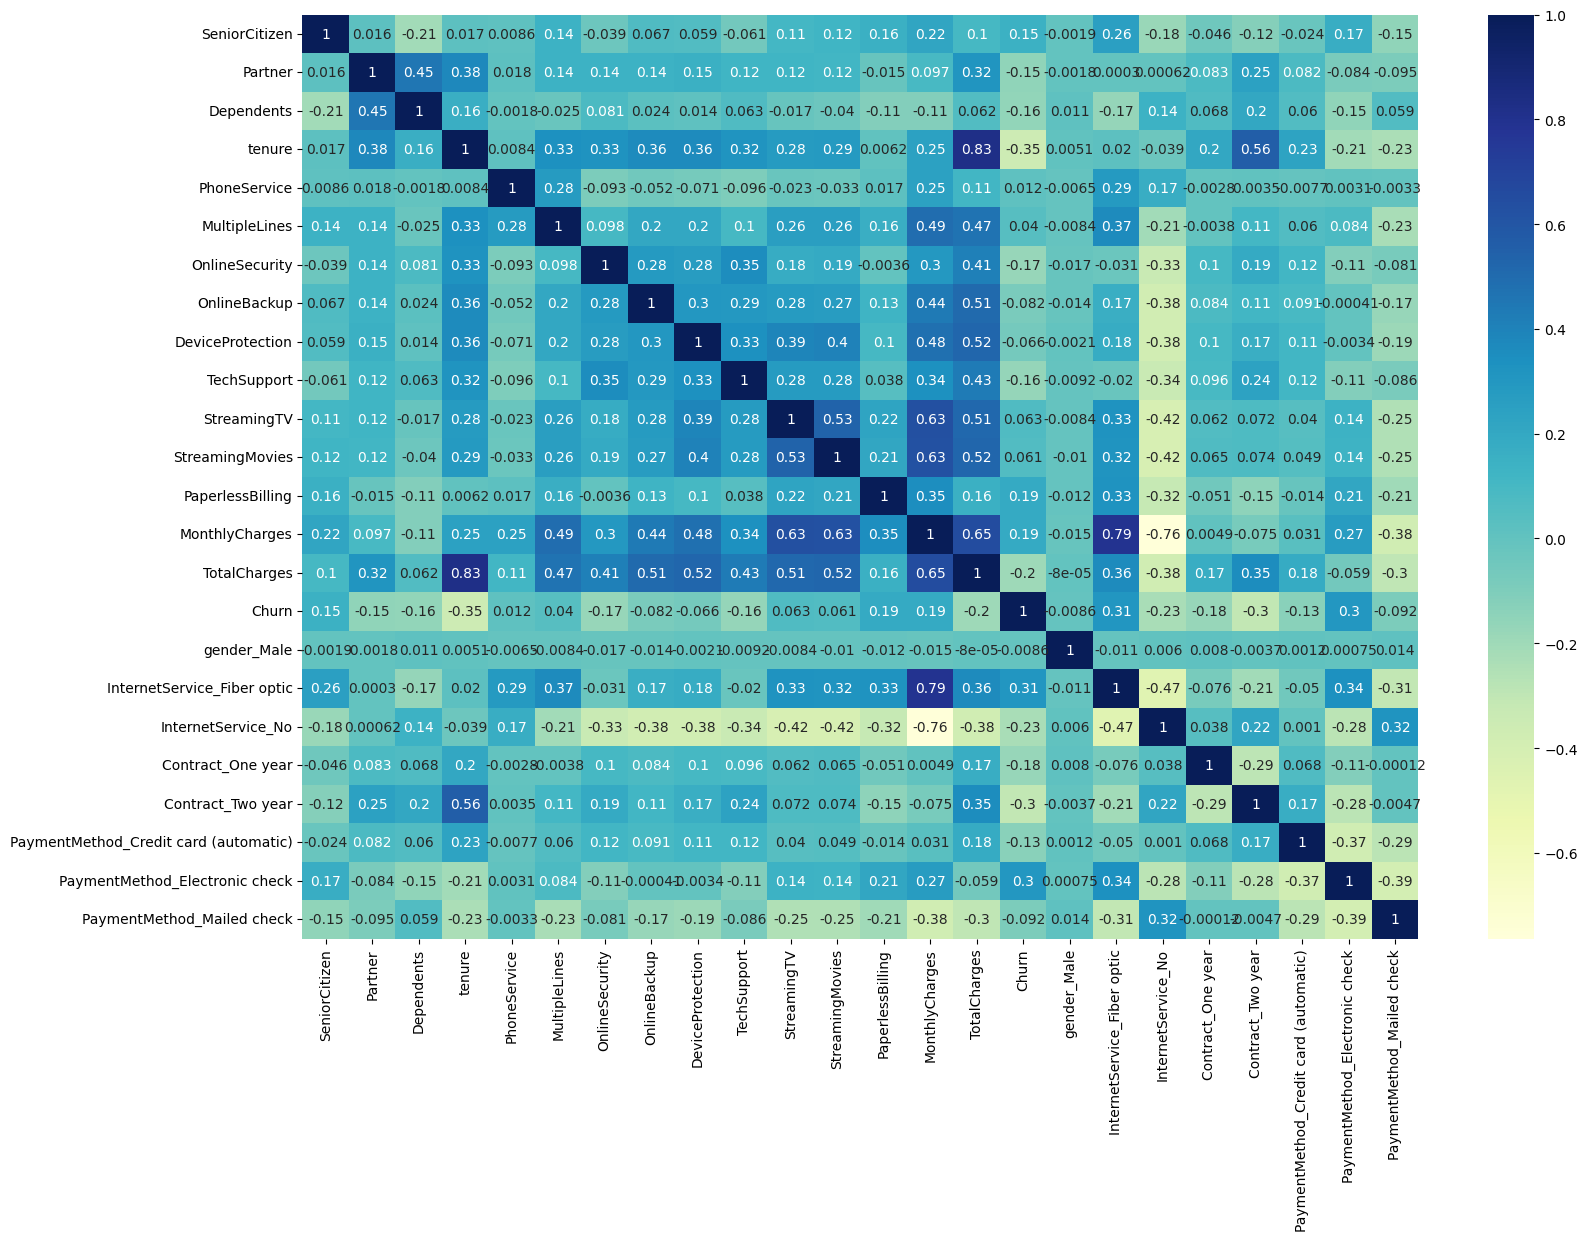

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, cbar=True)
plt.show()

<ipython-input-13-00f749159f80>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_correlations = df.corr()['Churn']


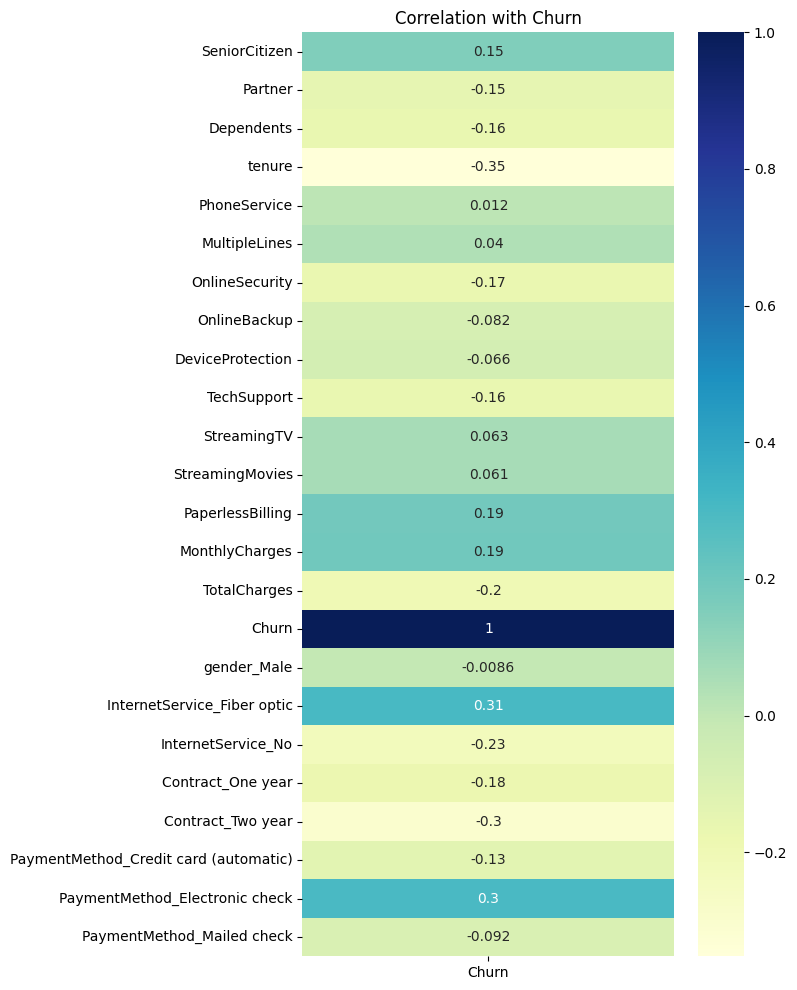

In [ ]:
plt.figure(figsize=(6,12))
churn_correlations = df.corr()['Churn']
sns.heatmap(churn_correlations.to_frame(), cmap="YlGnBu", annot=True, cbar=True)
plt.title('Correlation with Churn')
plt.show()

`Tenure`, `InternetService_Fiber optic` and `PaymentMethod_Electronic check` stand out as some of the columns with the highest correlation.

`Tenure` would certainly make sense as you'd expect customers who have been with the business for an extended period of time to have a sense of loyalty and reluctance to move.

## Visualisations

It's possible to delve deeper into the relationships between the potential features and `Churn` by plotting individual graphs.

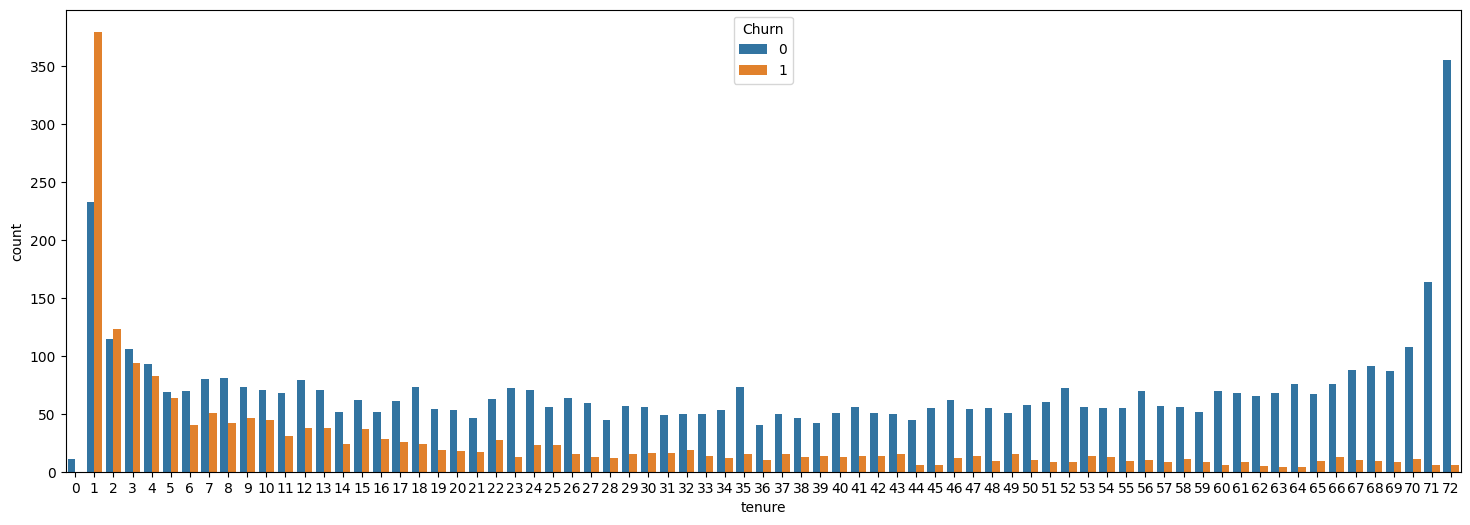

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(df, x='tenure', hue='Churn')
plt.show()

From the plot above I can see that generally higher proportions of `Churn` are for customers with a low `tenure`. As they are with the company for longer, the higher `tenure` values have a greater proportion of staying loyal.

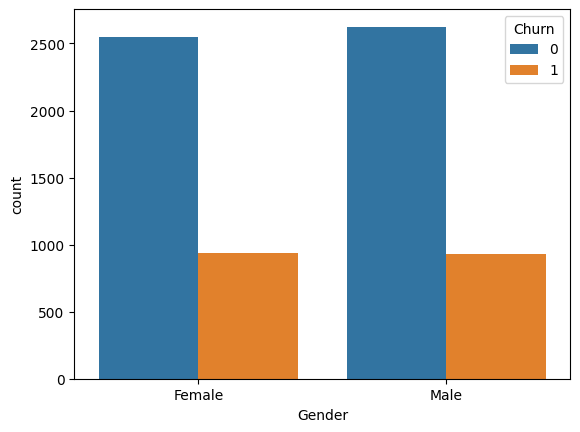

In [ ]:
sns.countplot(df, x='gender_Male', hue='Churn')
plt.xticks(ticks=(0,1), labels=['Female', 'Male'])
plt.xlabel('Gender')
plt.show()

The `Churn` proportion is equal for `Male` and `Female` genders.

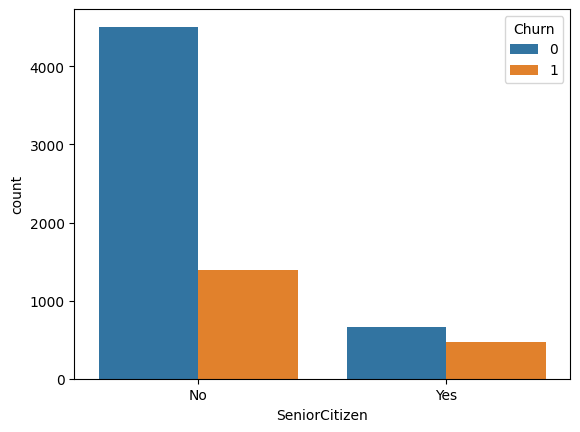

In [ ]:
sns.countplot(df, x='SeniorCitizen', hue='Churn')
plt.xticks(ticks=(0,1), labels=['No', 'Yes'])
plt.show()

For non-senior citizens, the ratio of non-churn to churn is roughly 3:1. For Senior Citizens, the proportions are almost equal.

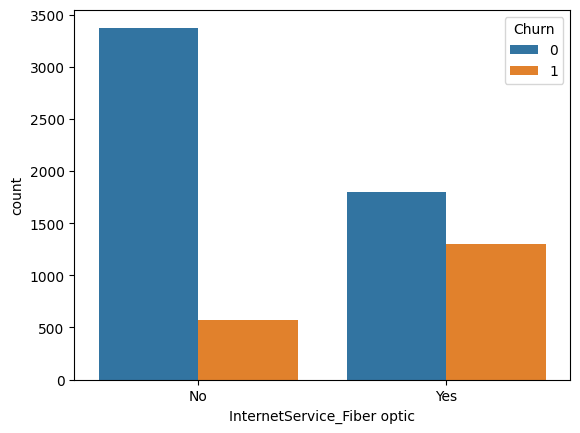

In [ ]:
sns.countplot(df, x='InternetService_Fiber optic', hue='Churn')
plt.xticks(ticks=(0,1), labels=['No', 'Yes'])
plt.show()

Customers with Fiber Optic broadband are far more likely to churn than those without. With high competition in the broadband provider space, this could indicate that it is easier to get better deals elsewhere for these services.

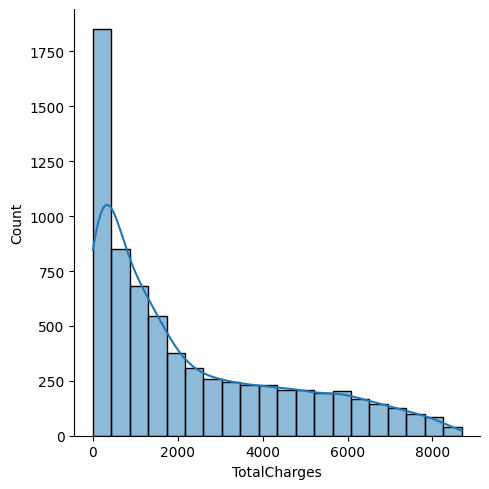

In [ ]:
sns.displot(df['TotalCharges'], kde=True, bins=20)
plt.show()

`TotalCharges` is right-skewed, with far fewer higher values. The highest values will be from those customers who have stayed with the business for the longest. This distribution is to be expected.

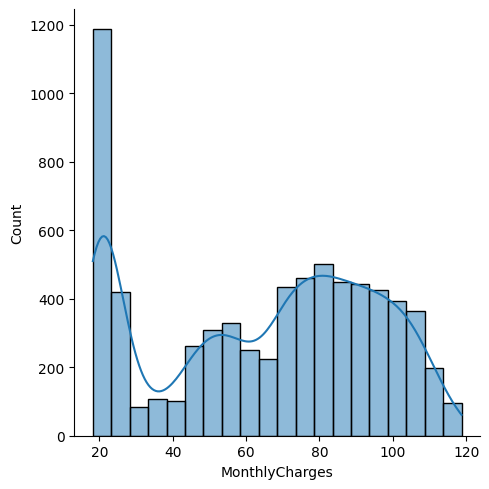

In [ ]:
sns.displot(df['MonthlyCharges'], kde=True, bins=20)
plt.show()

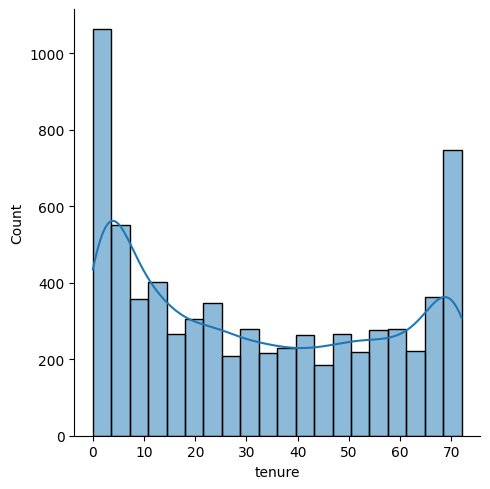

In [ ]:
sns.displot(df['tenure'], kde=True, bins=20)
plt.show()

The `tenure` distribution is the same as the one seen in the earlier countplot. There are a high number of new customers and high number of very loyal customers who have been with the business for 70+ months.

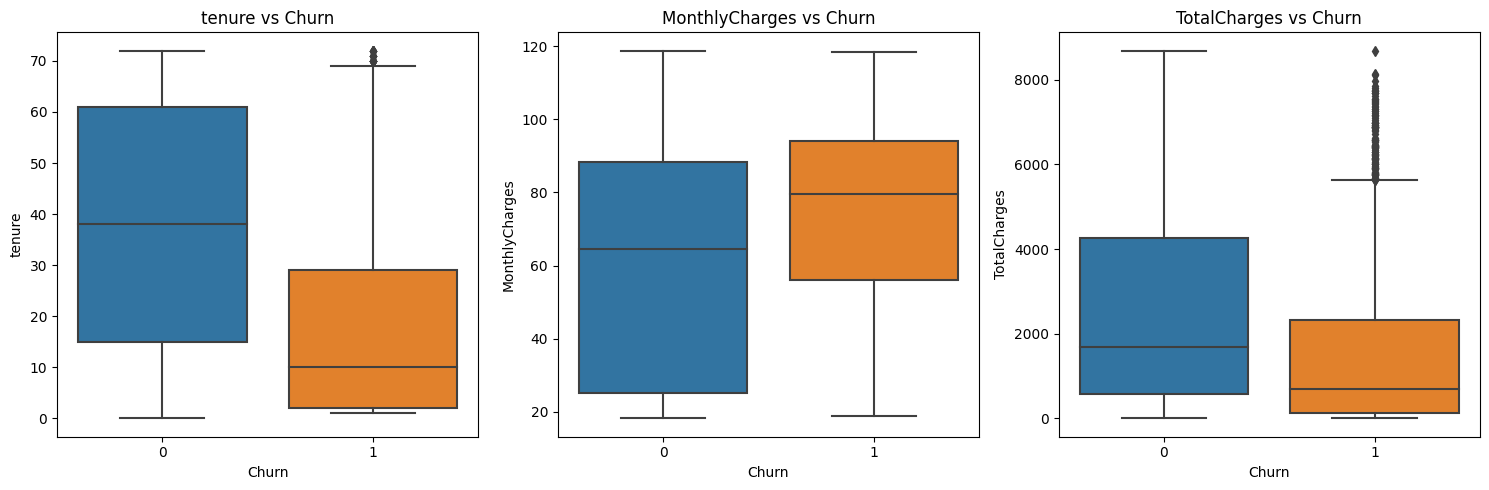

In [ ]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} vs Churn')

plt.tight_layout()
plt.show()

From the above boxplots, I can conclude the following:
- 75% of customers who churn are with the business for less than 30 months
- 50% of those who churn are customers for 12 months or less
- Generally those who churn are paying more monthly than those who don't churn
- Total Charges are generally lower for those who churn, although this will largely be explained by the lower tenure

## Feature Scaling and Splitting Data

I will remind myself of the different data columns by looking at the first few entries.

In [ ]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,29.85,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,1889.50,0,1,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,108.15,1,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,1840.75,0,1,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,151.65,1,0,1,0,0,0,0,1,0


Earlier in the project I identified that the dataset was heavily imbalanced towards non-churn customers - a 73% to 27% split.

Now I will look to address that using SMOTE (Synthetic Minority Oversampling Technique). SMOTE is used to tackle imbalancing problems and works by boosting the minority class by creating synthetic examples.

I will split the features into `X` and the labels into `y`. I will then instantiate a default SMOTE object and fit/resample the data.

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

oversample = SMOTE(random_state=12)
X, y = oversample.fit_resample(X, y)

I will then split 80% of the data into a training set and 20% into a testing set.

For the numerical features, I will scale them so that one isn't dominating the other. The `TotalCharges` for instance can get much higher than `tenure` and `MonthlyCharges`.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
X_train[numerical_features]

,tenure,MonthlyCharges,TotalCharges
7913,0.041667,0.068150,0.008748
2142,0.291667,0.463682,0.153924
3252,0.236111,0.436318,0.126272
2361,0.013889,0.275622,0.005291
2748,0.055556,0.261692,0.020070
...,...,...,...
3714,0.958333,0.412935,0.468623
7409,0.347222,0.705908,0.250627
3325,0.055556,0.670647,0.039022
9606,0.152778,0.741396,0.124195


From above I can see that the scaler has been applied correctly.

## Model Selection

For this project I will create three different models and evaluate their performance. The three I will use are: Logistic Regression, RandomForrestClassifier (RFC) and SVC.

When I evaluate their performance, I am particularly interested in the model accuracy and F1 score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)

print(f'Test Accuracy: {lr_accuracy}')
print(f'Test F1: {lr_f1}')

Test Accuracy: 0.8256038647342995
Test F1: 0.8246721709567751


In [ ]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1064
           1       0.81      0.84      0.82      1006

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=12)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)

print(f'Test Accuracy: {rf_accuracy}')
print(f'Test F1: {rf_f1}')

Test Accuracy: 0.8502415458937198
Test F1: 0.8471400394477318


In [ ]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1064
           1       0.84      0.85      0.85      1006

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [ ]:
from sklearn.svm import SVC

svc_model = SVC(probability=True, random_state=12)
svc_model.fit(X_train, y_train)

svc_preds = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_preds)
svc_f1 = f1_score(y_test, svc_preds)

print(f'Test Accuracy: {svc_accuracy}')
print(f'Test F1: {svc_f1}')

Test Accuracy: 0.8251207729468599
Test F1: 0.8220255653883972


In [ ]:
print(classification_report(y_test, svc_preds))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1064
           1       0.81      0.83      0.82      1006

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



Performance of the Logistic Regression and SVC models were very similar - both giving 0.83 for accuracy and F1 score. The RFC gave 0.85 for both.

It is worth noting that the Logistic Regression adn RFC models trained quicker than the SVC model - something that should not be disregarded.

## Hyperparameter Tuning

In an attempt to improve performance even further, I will do some Hyperparameter Tuning with the SVC and RFC models.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 2, 10],
          'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
          'gamma': ['scale', 'auto'],
          'shrinking': [True, False],
          }

model = SVC(probability=True, random_state=12)
grid_search = GridSearchCV(model, params, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_svc_params = grid_search.best_params_
best_svc_model = grid_search.best_estimator_

y_pred = best_svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

best_svc_params, accuracy

({'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True},
 0.8280193236714976)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1064
           1       0.82      0.83      0.82      1006

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



In [ ]:
params = {'n_estimators': [10, 25, 50, 100],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [10, 20, None],
          'min_samples_split': [2, 3, 4],
          'min_samples_leaf': [1, 2, 3],
          'max_features': ['sqrt', 'log2', None]
}

model = RandomForestClassifier(random_state=12, n_jobs=-1)
grid_search = GridSearchCV(model, params, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rfc_params = grid_search.best_params_
best_rfc_model = grid_search.best_estimator_

y_pred = best_rfc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

best_rfc_params, accuracy

({'criterion': 'gini',
  'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 50},
 0.8492753623188406)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1064
           1       0.84      0.86      0.85      1006

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



The accuracy of the SVC model has marginally improved from 0.825 to 0.828.

The accuracy of the RFC model has marginally reduced from the default RFC model previously created.
It is only a very minor reduction. As the hyperparameters for this model are clearly defined, for the purpose of this project I will move forward with this model.

## Prediction with New Data

In order to showcase the predictive ability of the model I've trained, I'm going to create a couple of brand new customer entries. Admittedly only two entries is nothing groundbreaking, however I just want to show that the model will result in a prediction for both. Below I will define the features for the two new customers - they are random.

In [ ]:
new_customers = pd.DataFrame(columns=list(X.columns))
customer_1 = {'SeniorCitizen': 1, 'Partner': 1, 'Dependents': 1, 'tenure': 12, 'PhoneService': 1, 'MultipleLines': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0,
              'PaperlessBilling': 0, 'MonthlyCharges': 24.95, 'TotalCharges': 299.40, 'gender_Male': 0, 'InternetService_Fiber optic': 0, 'InternetService_No': 1, 'Contract_One year': 0, 'Contract_Two year': 1,
              'PaymentMethod_Credit card (automatic)': 1,  'PaymentMethod_Electronic check': 0,  'PaymentMethod_Mailed check': 0}
new_customers.loc[len(new_customers)] = customer_1
customer_2 = {'SeniorCitizen': 0, 'Partner': 1, 'Dependents': 0, 'tenure': 4, 'PhoneService': 1, 'MultipleLines': 0, 'OnlineSecurity': 1, 'OnlineBackup': 1, 'DeviceProtection': 1, 'TechSupport': 1, 'StreamingTV': 1, 'StreamingMovies': 1,
              'PaperlessBilling': 1, 'MonthlyCharges': 89.95, 'TotalCharges': 359.80, 'gender_Male': 1, 'InternetService_Fiber optic': 1, 'InternetService_No': 0, 'Contract_One year': 0, 'Contract_Two year': 0,
              'PaymentMethod_Credit card (automatic)': 1,  'PaymentMethod_Electronic check': 0,  'PaymentMethod_Mailed check': 0}
new_customers.loc[len(new_customers)] = customer_2

new_customers.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,1,12,1,0,0,0,0,0,...,24.95,299.4,0,0,1,0,1,1,0,0
1,0,1,0,4,1,0,1,1,1,1,...,89.95,359.8,1,1,0,0,0,1,0,0


Now that `customer_1` and `customer_2` have been created and combined into the `new_customers` DataFrame, I need to apply the MinMaxScaler to the numerical features. This is important because the model I trained earlier was trained on scaled data. If I don't apply the same preprocessing as used previously, the predictive ability of the model may be impacted.

In [ ]:
new_customers[numerical_features] = scaler.transform(new_customers[numerical_features])
new_customers.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,1,0.166667,1,0,0,0,0,0,...,0.066667,0.034474,0,0,1,0,1,1,0,0
1,0,1,0,0.055556,1,0,1,1,1,1,...,0.713433,0.041429,1,1,0,0,0,1,0,0


Now that the new data has been prepared, I can generate Churn Predictions for both of the customers.

In [ ]:
new_customer_preds = best_rfc_model.predict(new_customers)
new_customer_probs = best_rfc_model.predict_proba(new_customers)

new_customers['churn'] = new_customer_preds
new_customers['probability_churn'] = new_customer_probs[:, 1]
new_customers.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn,probability_churn
0,1,1,1,0.166667,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0.013333
1,0,1,0,0.055556,1,0,1,1,1,1,...,1,1,0,0,0,1,0,0,1,0.522000


The `churn` column simply provides a `0` or `1` to indicate no-churn or churn respectively. The `probability_churn` column indicates the likelihood of that customer churning.

For the first customer the probability is `0.013333` - predicting it is extremely unlikely for that customer to churn.
For the second customer the probability of is `0.522000` - hence why it has been rounded up to `1`. You might argue that this value is far too close to 50% to have an accurate prediction.

In a business environment, a cutoff probability could be considered depending on how many are predicted to churn. This would ensure that business resources are allocated efficiently.